<a href="https://colab.research.google.com/github/fxnnxc/antisymmetric_weight_analysis/blob/main/anti_symmetric_normal_diagonal_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

from sklearn.metrics import accuracy_score
from keras.datasets import reuters, mnist
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

import tensorflow as tf
from tensorflow import keras
from keras.layers import RNN
from keras import backend as K

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier


def my_init1(shape, dtype=None):
    return tf.random.normal(shape, dtype=dtype)

def my_init2(shape, dtype=None):
    w = np.random.normal(size=shape)
    w1 = np.triu(w, k=1)
    w2 = w1.T
    ret = w1-w2 + np.ones(shape=shape) * 0.1 
    ret = tf.convert_to_tensor(ret, dtype=dtype)
    return ret

def my_init3(shape, dtype=None):
    w = np.random.normal(size=shape)
    w1 = np.triu(w, k=1)
    w2 = w1.T
    ret = w1-w2 + np.ones(shape=shape) * 0.5
    ret = tf.convert_to_tensor(ret, dtype=dtype)
    return ret

def my_init4(shape, dtype=None):
    w = np.random.normal(size=shape)
    w1 = np.triu(w, k=1)
    w2 = w1.T
    ret = w1-w2 + np.ones(shape=shape) * 1.0
    ret = tf.convert_to_tensor(ret, dtype=dtype)
    return ret


def vanilla_rnn_reuter_init1():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape = (49,1), recurrent_initializer=my_init1))   # return_sequences parameter has to be set True to stack
    model.add(Dense(46))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.0001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

def vanilla_rnn_reuter_init2():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape = (49,1), recurrent_initializer=my_init2))   # return_sequences parameter has to be set True to stack
    model.add(Dense(46))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.0001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

def vanilla_rnn_reuter_init3():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape = (49,1), recurrent_initializer=my_init3))   # return_sequences parameter has to be set True to stack
    model.add(Dense(46))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.0001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

def vanilla_rnn_reuter_init4():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape = (49,1), recurrent_initializer=my_init4))   # return_sequences parameter has to be set True to stack
    model.add(Dense(46))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.0001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model



In [ ]:
# parameters for data load
num_words = 30000
maxlen = 50
test_split = 0.3


train_data, test_data = np.load('/content/drive/My Drive/Data/data/reuter_train.npz'), np.load('/content/drive/My Drive/Data/data/reuter_test.npz')
X_train, y_train = train_data['X'], train_data['y']
X_test, y_test = test_data['X'], test_data['y']
# pad the sequences with zeros 
# padding parameter is set to 'post' => 0's are appended to end of sequences
"""
X_train = pad_sequences(X_train, padding = 'post')
X_test = pad_sequences(X_test, padding = 'post')

X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

y_data = np.concatenate((y_train, y_test))
y_data = to_categorical(y_data)

y_train = y_data[:1395]
y_test = y_data[1395:]
"""

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1395, 49, 1)
(599, 49, 1)
(1395, 46)
(599, 46)


# Reuter Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#normal
model = KerasClassifier(build_fn = vanilla_rnn_reuter_init1, epochs = 300, batch_size = 128, verbose = 1)
history1 = model.fit(X_train, y_train, validation_data=(X_test, y_test))

# anti symmetric normal 0.1
model = KerasClassifier(build_fn = vanilla_rnn_reuter_init2, epochs = 300, batch_size = 128, verbose = 1)
history2 = model.fit(X_train, y_train,validation_data=(X_test, y_test))

# anti symmetric normal 0.5
model = KerasClassifier(build_fn = vanilla_rnn_reuter_init3, epochs = 300, batch_size = 128, verbose = 1)
history3 = model.fit(X_train, y_train,validation_data=(X_test, y_test))

# anti symmetric normal 1.0
model = KerasClassifier(build_fn = vanilla_rnn_reuter_init4, epochs = 300, batch_size = 128, verbose = 1)
history4 = model.fit(X_train, y_train,validation_data=(X_test, y_test))
    

Epoch 1/300
11/11 [==============================] - 1s 50ms/step - loss: 4.2228 - accuracy: 0.0244 - val_loss: 4.2256 - val_accuracy: 0.0384
Epoch 2/300
11/11 [==============================] - 0s 34ms/step - loss: 4.2114 - accuracy: 0.0265 - val_loss: 4.2379 - val_accuracy: 0.0351
Epoch 3/300
11/11 [==============================] - 0s 36ms/step - loss: 4.1999 - accuracy: 0.0244 - val_loss: 4.1978 - val_accuracy: 0.0317
Epoch 4/300
11/11 [==============================] - 0s 33ms/step - loss: 4.1724 - accuracy: 0.0294 - val_loss: 4.1745 - val_accuracy: 0.0301
Epoch 5/300
11/11 [==============================] - 0s 33ms/step - loss: 4.2171 - accuracy: 0.0287 - val_loss: 4.2016 - val_accuracy: 0.0417
Epoch 6/300
11/11 [==============================] - 0s 33ms/step - loss: 4.2208 - accuracy: 0.0301 - val_loss: 4.1971 - val_accuracy: 0.0451
Epoch 7/300
11/11 [==============================] - 0s 34ms/step - loss: 4.1731 - accuracy: 0.0401 - val_loss: 4.1656 - val_accuracy: 0.0417
Epoch 

# Loss 

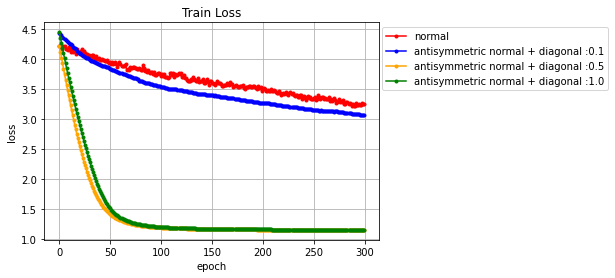

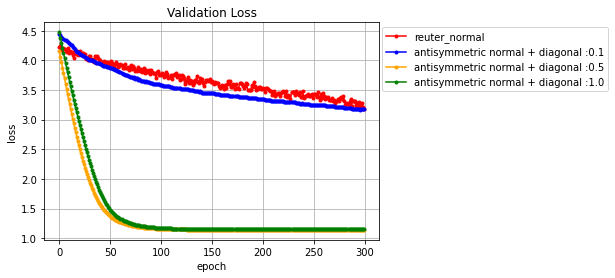

In [ ]:
import matplotlib.pyplot as plt

y_loss_1 = history1.history['loss']
y_loss_2 = history2.history['loss']
y_loss_3 = history3.history['loss']
y_loss_4 = history4.history['loss']

x_len = np.arange(len(y_loss_1))
plt.plot(x_len, y_loss_1, marker='.', c='red', label="normal")
plt.plot(x_len, y_loss_2, marker='.', c='blue', label="antisymmetric normal + diagonal :0.1" )
plt.plot(x_len, y_loss_3, marker='.', c='orange', label="antisymmetric normal + diagonal :0.5")
plt.plot(x_len, y_loss_4, marker='.', c='green', label="antisymmetric normal + diagonal :1.0")

plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1))
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title("Train Loss")

plt.figure()

y_loss_1 = history1.history['val_loss']
y_loss_2 = history2.history['val_loss']
y_loss_3 = history3.history['val_loss']
y_loss_4 = history4.history['val_loss']

x_len = np.arange(len(y_loss_1))
plt.plot(x_len, y_loss_1, marker='.', c='red', label="reuter_normal")
plt.plot(x_len, y_loss_2, marker='.', c='blue', label="antisymmetric normal + diagonal :0.1")
plt.plot(x_len, y_loss_3, marker='.', c='orange',label="antisymmetric normal + diagonal :0.5")
plt.plot(x_len, y_loss_4, marker='.', c='green', label="antisymmetric normal + diagonal :1.0")
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1))
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title("Validation Loss")
plt.show()

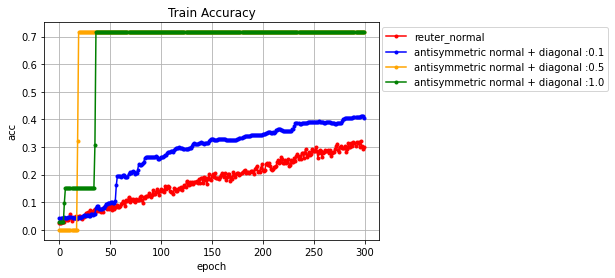

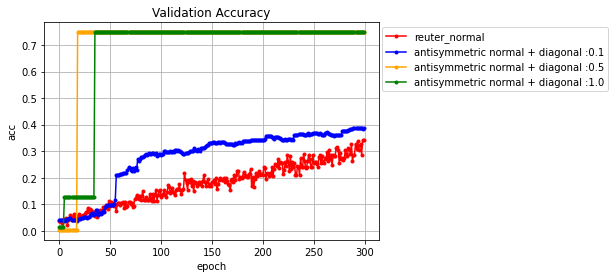

In [ ]:
import matplotlib.pyplot as plt

y_loss_1 = history1.history['accuracy']
y_loss_2 = history2.history['accuracy']
y_loss_3 = history3.history['accuracy']
y_loss_4 = history4.history['accuracy']

x_len = np.arange(len(y_loss_1))
plt.plot(x_len, y_loss_1, marker='.', c='red', label="reuter_normal")
plt.plot(x_len, y_loss_2, marker='.', c='blue', label="antisymmetric normal + diagonal :0.1")
plt.plot(x_len, y_loss_3, marker='.', c='orange',label="antisymmetric normal + diagonal :0.5")
plt.plot(x_len, y_loss_4, marker='.', c='green', label="antisymmetric normal + diagonal :1.0")

plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1))
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title("Train Accuracy")

plt.figure()

y_loss_1 = history1.history['val_accuracy']
y_loss_2 = history2.history['val_accuracy']
y_loss_3 = history3.history['val_accuracy']
y_loss_4 = history4.history['val_accuracy']

x_len = np.arange(len(y_loss_1))
plt.plot(x_len, y_loss_1, marker='.', c='red', label="reuter_normal")
plt.plot(x_len, y_loss_2, marker='.', c='blue', label="antisymmetric normal + diagonal :0.1")
plt.plot(x_len, y_loss_3, marker='.', c='orange',label="antisymmetric normal + diagonal :0.5")
plt.plot(x_len, y_loss_4, marker='.', c='green', label="antisymmetric normal + diagonal :1.0")

plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1))
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title("Validation Accuracy")
plt.show()